<a href="https://colab.research.google.com/github/junghyeonsu/python-machineLearning-youtube/blob/master/4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

작동을 위한 import

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_resource_variables()

H(x) = Wx + b 구하기

In [0]:
# x 와 y 데이터
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# H(x) = Wx + b
hypothesis = x_train * W + b

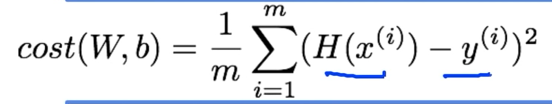

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

**GradientDescent**

cost를 최소화하는 과정

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

세션만들고 실행하기

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  sess.run(train)
  if step % 100 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 6.5223274 [0.35125095] [-1.20085]
100 0.05215466 [1.2652344] [-0.6029612]
200 0.03222841 [1.2085046] [-0.47397986]
300 0.019915214 [1.1639037] [-0.37259138]
400 0.012306388 [1.1288432] [-0.29289076]
500 0.00760463 [1.1012827] [-0.23023903]
600 0.0046991813 [1.0796171] [-0.18098867]
700 0.0029038072 [1.0625865] [-0.14227359]
800 0.0017943826 [1.0491986] [-0.11184009]
900 0.0011088172 [1.0386745] [-0.08791651]
1000 0.0006851787 [1.0304017] [-0.06911033]
1100 0.00042340052 [1.0238986] [-0.05432705]
1200 0.00026163834 [1.0187864] [-0.04270625]
1300 0.00016167674 [1.0147679] [-0.03357096]
1400 9.9906865e-05 [1.011609] [-0.02638993]
1500 6.1736006e-05 [1.0091257] [-0.02074485]
1600 3.8149534e-05 [1.0071738] [-0.01630734]
1700 2.3574312e-05 [1.0056392] [-0.01281907]
1800 1.4567424e-05 [1.0044329] [-0.01007702]
1900 9.00221e-06 [1.0034847] [-0.00792152]
2000 5.562802e-06 [1.0027394] [-0.00622716]


위에 코드를 보면 H(x) = 1x + 0 에 수렴해야 되므로

W가 1로 수렴 b가 0에 수렴하는것을 볼수있다.

 그리고 cost도 작아지고있다.

In [14]:
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# H(x) = Wx + b
hypothesis = X * W + b

#reduce_mean = 평균을 내는 함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 지금은 마법이라고 생각하기
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # 코스트를 작게하도록 train !

for step in range(2001):
  cost_val, W_val, b_val, _ = sess.run([cost,W,b,train], feed_dict={X: [1,2,3,4,5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})

  if step % 100 == 0 :
    print(step, cost_val, W_val, b_val)

0 1.2099638 [1.0660205] [0.02194883]
100 0.09651035 [1.2010083] [0.37429598]
200 0.04902408 [1.1432623] [0.5827775]
300 0.02490268 [1.1021057] [0.73136586]
400 0.012649739 [1.0727726] [0.83726776]
500 0.006425659 [1.0518664] [0.9127459]
600 0.0032640342 [1.0369662] [0.9665404]
700 0.001658023 [1.0263464] [1.0048809]
800 0.00084221817 [1.0187776] [1.0322069]
900 0.00042781598 [1.013383] [1.0516828]
1000 0.00021731055 [1.0095382] [1.0655639]
1100 0.00011038957 [1.0067981] [1.0754564]
1200 5.607312e-05 [1.0048451] [1.0825075]
1300 2.8482795e-05 [1.0034533] [1.0875326]
1400 1.4467101e-05 [1.0024611] [1.091115]
1500 7.348368e-06 [1.001754] [1.0936674]
1600 3.7319792e-06 [1.00125] [1.0954869]
1700 1.8962932e-06 [1.0008911] [1.0967832]
1800 9.635044e-07 [1.0006353] [1.0977069]
1900 4.8949414e-07 [1.0004529] [1.0983654]
2000 2.4888877e-07 [1.0003228] [1.0988345]


요기서도 H(x)= x + 0.1 에 수렴해야되므로

W는 1, b = 0.1에 수렴하는것을 볼수 있다.

아래에서 우리의 model을 test 해보자

In [16]:
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5, 3.5]}))

[6.1004486]
[3.5996416]
[3.5996416 4.599964 ]
